In [17]:
import pandas as pd

In [18]:
tenis_df = pd.read_csv("dane/Dane_ATP_2000-2024 d.csv", sep=';')

In [19]:
tenis_df.head(5)

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2000-301,Auckland,Hard,32,A,20000110,1,103163,1.0,NaN,...,55.0,39.0,29.0,17.0,4.0,7.0,11.0,1612.0,63.0,595.0
1,2000-301,Auckland,Hard,32,A,20000110,2,102607,NaN,Q,...,32.0,25.0,18.0,12.0,3.0,6.0,211.0,157.0,49.0,723.0
2,2000-301,Auckland,Hard,32,A,20000110,3,103252,NaN,NaN,...,33.0,20.0,7.0,8.0,7.0,11.0,48.0,726.0,59.0,649.0
3,2000-301,Auckland,Hard,32,A,20000110,4,103507,7.0,NaN,...,43.0,29.0,14.0,10.0,6.0,8.0,45.0,768.0,61.0,616.0
4,2000-301,Auckland,Hard,32,A,20000110,5,102103,NaN,Q,...,46.0,34.0,18.0,12.0,5.0,9.0,167.0,219.0,34.0,873.0


In [20]:
columns_to_drop = [
    'tourney_id', 'tourney_name', 'draw_size', 'match_num', 'winner_seed',
    'winner_name', 'loser_seed', 'winner_ioc', 'loser_name', 'loser_seed',
    'loser_ioc', 'score'
]

tenis_df = tenis_df.drop(columns=columns_to_drop)
tenis_df.head(5)

,surface,tourney_level,tourney_date,winner_id,winner_entry,winner_hand,winner_ht,winner_age,loser_id,loser_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,Hard,A,20000110,103163,NaN,R,188.0,21.7,101543,NaN,...,55.0,39.0,29.0,17.0,4.0,7.0,11.0,1612.0,63.0,595.0
1,Hard,A,20000110,102607,Q,R,190.0,24.5,102644,NaN,...,32.0,25.0,18.0,12.0,3.0,6.0,211.0,157.0,49.0,723.0
2,Hard,A,20000110,103252,NaN,R,175.0,21.3,102238,NaN,...,33.0,20.0,7.0,8.0,7.0,11.0,48.0,726.0,59.0,649.0
3,Hard,A,20000110,103507,NaN,R,183.0,19.9,103819,NaN,...,43.0,29.0,14.0,10.0,6.0,8.0,45.0,768.0,61.0,616.0
4,Hard,A,20000110,102103,Q,R,180.0,27.3,102765,NaN,...,46.0,34.0,18.0,12.0,5.0,9.0,167.0,219.0,34.0,873.0


<Axes: ylabel='count'>

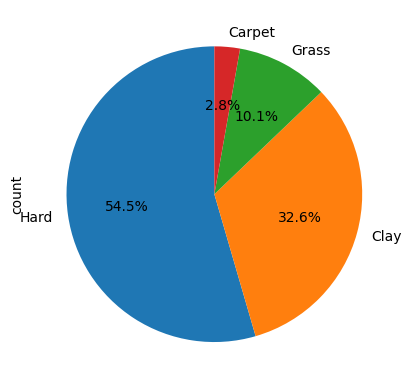

In [21]:
tenis_df = tenis_df.dropna(subset=['surface'])
surface = tenis_df['surface'].value_counts()
surface.plot(kind='pie', autopct='%1.1f%%', startangle=90)

In [22]:
columns_for_rolling_averages = [
    'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced',
    'l_ace', 'l_df', 'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced'
]
# Create a copy of the dataset for feature engineering
rolling_data = tenis_df.copy()

# Function to calculate rolling averages for each player
def calculate_rolling_averages(df, player_id_col, stats, normalize=False):
    # Create an empty DataFrame for storing rolling averages
    rolling_features = pd.DataFrame()

    # Group by player
    grouped = df.groupby(player_id_col)

    for stat in stats:
        # Compute rolling average (last 10 matches)
        rolling_avg = grouped[stat].rolling(window=10, min_periods=1).mean().reset_index(0, drop=True)

        # Add to the rolling features DataFrame
        rolling_features[f'{stat}_rolling_avg'] = rolling_avg

    return rolling_features

# Calculate rolling averages for winners and losers
winner_rolling_avg = calculate_rolling_averages(rolling_data, 'winner_id', columns_for_rolling_averages, normalize=False)
loser_rolling_avg = calculate_rolling_averages(rolling_data, 'loser_id', columns_for_rolling_averages, normalize=False)

# Merge the rolling averages back into the original dataset
rolling_data = pd.concat([rolling_data.reset_index(drop=True), winner_rolling_avg, loser_rolling_avg], axis=1)
# Remove the original columns
rolling_data = rolling_data.drop(columns=columns_for_rolling_averages)

# Display the dataset with rolling averages
print("Dataset with rolling averages shape:", rolling_data.shape)
rolling_data.head()


Dataset with rolling averages shape: (73247, 56)


,surface,tourney_level,tourney_date,winner_id,winner_entry,winner_hand,winner_ht,winner_age,loser_id,loser_entry,...,w_bpFaced_rolling_avg,l_ace_rolling_avg,l_df_rolling_avg,l_svpt_rolling_avg,l_1stIn_rolling_avg,l_1stWon_rolling_avg,l_2ndWon_rolling_avg,l_SvGms_rolling_avg,l_bpSaved_rolling_avg,l_bpFaced_rolling_avg
0,Hard,A,20000110.0,103163.0,NaN,R,188.0,21.7,101543.0,NaN,...,5.0,7.0,8.0,106.0,55.0,39.0,29.0,17.0,4.0,7.0
1,Hard,A,20000110.0,102607.0,Q,R,190.0,24.5,102644.0,NaN,...,6.0,5.0,10.0,74.0,32.0,25.0,18.0,12.0,3.0,6.0
2,Hard,A,20000110.0,103252.0,NaN,R,175.0,21.3,102238.0,NaN,...,1.0,0.0,6.0,56.0,33.0,20.0,7.0,8.0,7.0,11.0
3,Hard,A,20000110.0,103507.0,NaN,R,183.0,19.9,103819.0,NaN,...,0.0,11.0,2.0,70.0,43.0,29.0,14.0,10.0,6.0,8.0
4,Hard,A,20000110.0,102103.0,Q,R,180.0,27.3,102765.0,NaN,...,11.0,8.0,8.0,92.0,46.0,34.0,18.0,12.0,5.0,9.0


(73247, 56)